In [1]:
import pandas as pd
import sqlite3

In [3]:
dbconn = sqlite3.connect('mydw2')

In [4]:
cursor = dbconn.cursor()

In [37]:
doc_finesDF = pd.read_csv(r'C:\Users\HP\Documents\Fines_paid_by_doctors.csv')
doc_finesDF.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-


In [51]:
doc_finesDF[' cash_fine '] = doc_finesDF[' cash_fine '].str.replace(',', '')
doc_finesDF[' cash_fine ']= doc_finesDF[' cash_fine '].str.replace('$', '')
doc_finesDF[' online_fine '] = doc_finesDF[' online_fine '].str.replace(',', '')
doc_finesDF[' online_fine ']= doc_finesDF[' online_fine '].str.replace('$', '')
doc_finesDF[' online_fine '] = pd.to_numeric(doc_finesDF[' online_fine '], errors='coerce').fillna(0).astype(int)
doc_finesDF[' cash_fine '] = pd.to_numeric(doc_finesDF[' cash_fine '], errors='coerce').fillna(0).astype(int)
doc_finesDF.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625,0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000,0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0,448
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0,119
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800,0


In [10]:
doc_finesDF.dtypes

org_indiv        object
first_name       object
last_name        object
city             object
state            object
category         object
 cash_fine        int32
 online_fine      int32
dtype: object

In [52]:
doc_finesDF.to_sql('docsfines', con=dbconn, if_exists='replace')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [55]:
emailsDF = pd.read_excel(r'C:\Users\HP\Documents\Emails_sent.xlsx')
emailsDF.head()

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health


QUESTION 1

In [56]:
emailsDF['mail_sent_date'] = pd.to_datetime(emailsDF['mail_sent_date'])

In [19]:
emailsDF.head()

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014-11-15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014-07-17,Center for Devices and Radiological Health


In [74]:
emailsDF.to_sql('emails', con=dbconn, if_exists='replace')

QUESTION 2

In [76]:
emailsDF["name_full"] = emailsDF["name_first"] + " " + emailsDF["name_last"]
emailsDF.groupby([emailsDF['mail_sent_date'].dt.year.rename('year')]).agg({'count'})

,name_last,name_first,name_middle,mail_sent_date,office,name_full
,count,count,count,count,count,count
year,,,,,,
2006,1,1,0,1,1,1
2007,15,15,1,15,15,15
2008,8,8,1,8,8,8
2009,14,14,10,14,14,14
2010,25,25,24,25,25,25
2011,20,20,12,20,20,20
2012,16,16,11,16,16,16
2013,21,21,15,21,21,21


In [77]:
emailsDF["name_full"] = emailsDF["name_first"] + " " + emailsDF["name_last"]
emailsDF.groupby([emailsDF['mail_sent_date'].dt.year.rename('year')]).agg({'count'}).agg({'max'})

,name_last,name_first,name_middle,mail_sent_date,office,name_full
,count,count,count,count,count,count
max,32,32,25,32,32,32


Hence 2014 is the answer.

QUESTION 4

In [59]:
pd.read_sql_query('select "state", Max(" cash_fine " + " online_fine ") as "highest_total_fine", Min(" cash_fine " + " online_fine ") as "lowest_total_fine" from docsfines GROUP BY "state"', con=dbconn)

,state,highest_total_fine,lowest_total_fine
0,AK,1750,1750
1,AL,232991,26
2,AR,77670,26
3,AZ,151642,26
4,CA,323122,25
5,CO,282565,31
6,CT,132853,25
7,DC,62000,25
8,DE,19750,36
9,FL,1185466,25


QUESTION 5

In [60]:
pd.read_sql_query('select "state", SUM(" online_fine ") from docsfines GROUP BY "state" order by SUM(" online_fine ") limit 2', con=dbconn)

,state,"SUM("" online_fine "")"
0,AK,0
1,ND,321


QUESTION 6

In [61]:
pd.read_sql_query('select "state", SUM(" cash_fine ") AS "total_cash_fine", COUNT(DISTINCT("org_indiv")) AS "Doctors_contributed" from docsfines GROUP BY "state" ORDER BY SUM(" cash_fine ") DESC LIMIT 1', con=dbconn)

,state,total_cash_fine,Doctors_contributed
0,CA,4331517,554


QUESTION 7

In [62]:
pd.read_sql_query('select Avg(" cash_fine " + " online_fine ") AS "average_fine", "state" from docsfines GROUP BY "state" ORDER BY Avg(" cash_fine " + " online_fine ") DESC limit 5', con=dbconn)

,average_fine,state
0,6813.787645,MA
1,6384.037037,NH
2,6184.040541,CO
3,6079.464752,NC
4,5236.896552,OR


In [63]:
pd.read_sql_query('select Avg(" cash_fine " + " online_fine ") AS "average_fine", "category" from docsfines GROUP BY "category" ORDER BY Avg(" cash_fine " + " online_fine ") DESC limit 5', con=dbconn)

,average_fine,category
0,65838.886364,Infosys Sponsored Research initiated on or aft...
1,54864.896552,Infosys Sponsored Research initiated before Ju...
2,42407.500000,Investigator-Initiated Research
3,4963.692459,Professional Advising
4,3375.558278,Expert-Led Forums


QUESTION 8

Number of fines in each category

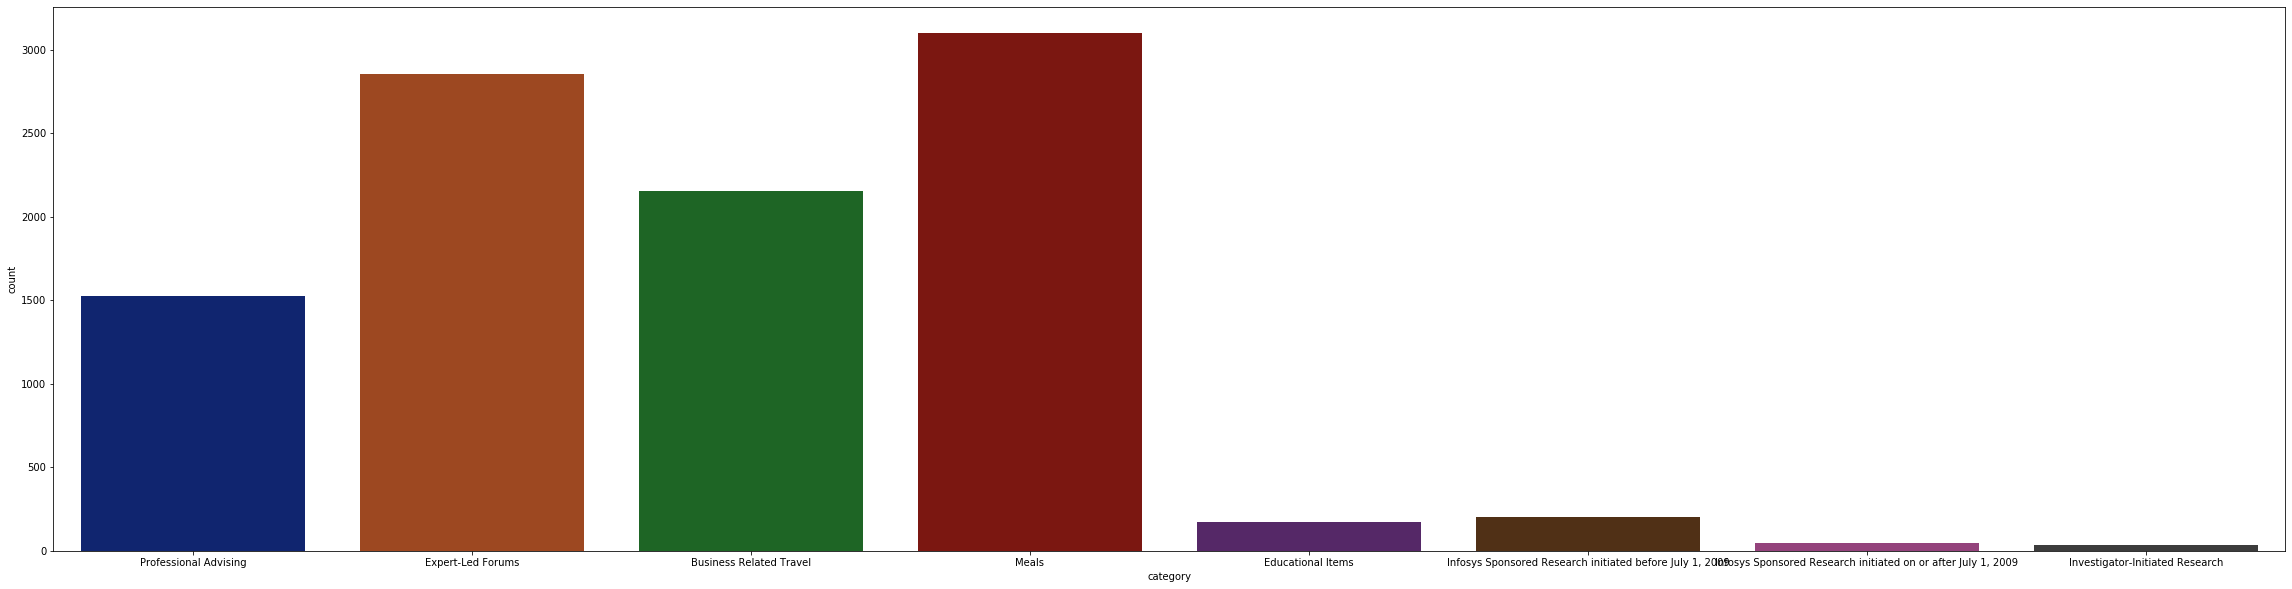

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (40,10))
ax = sns.countplot(x="category", data=doc_finesDF, palette="dark")

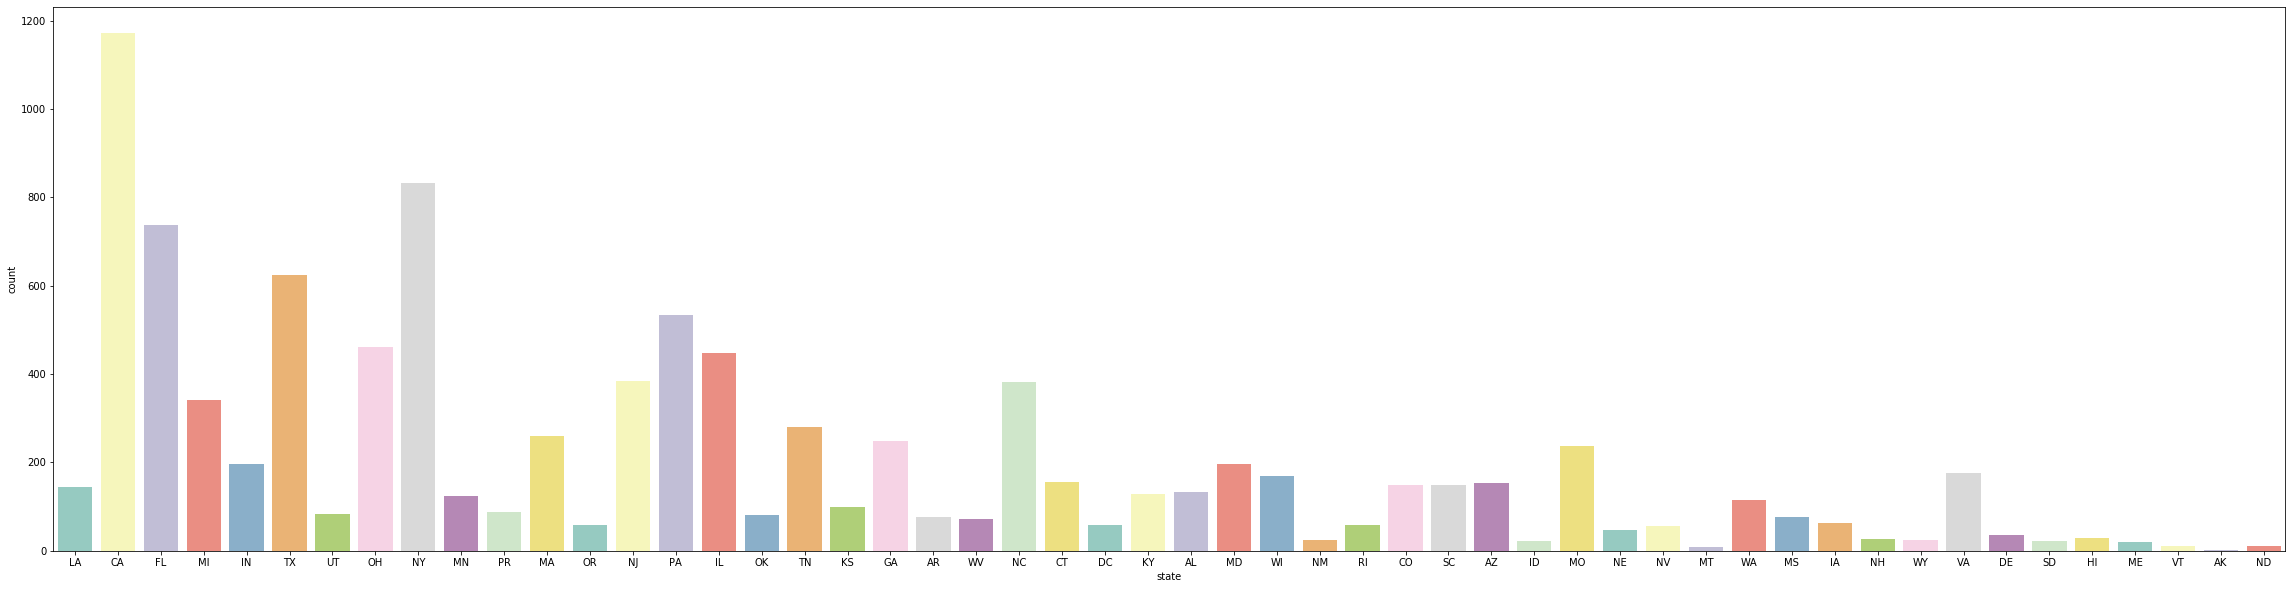

In [89]:
plt.figure(figsize = (40,10))
bx = sns.countplot(x="state", data=doc_finesDF, palette="Set3")